In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel("cust_data.xlsx", index_col=0)
data.head(5)

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [4]:
data.Gender.unique()

array(['M', 'F', nan], dtype=object)

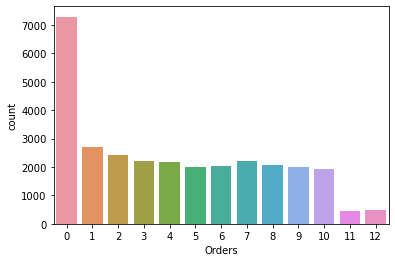

In [5]:
sns.countplot(data=data, x='Orders')

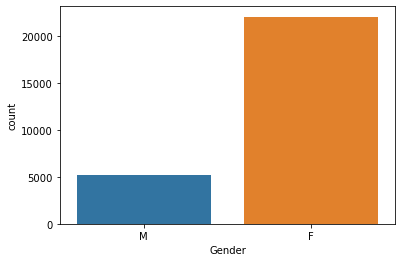

In [6]:
sns.countplot(data=data, x='Gender')

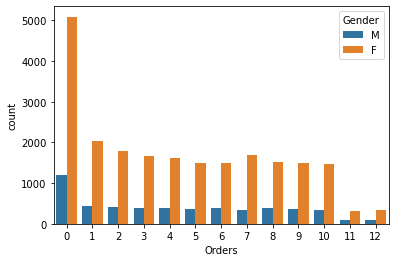

In [7]:
sns.countplot(data=data, x='Orders', hue='Gender')

In [8]:
# data['Gender']= data['Gender'].replace({'M':0,'F':1 })

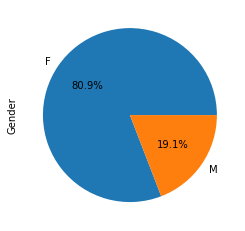

In [9]:
data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [10]:
data.describe(include=object)

,Gender
count,27276
unique,2
top,F
freq,22054


In [11]:
data.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

In [12]:
# left = data[data['Gender'] == np.nan ] # Step 1
# data = data.drop(left.index, axis=0) # Step 2

In [13]:
data['Gender'].replace('NA', np.nan, inplace=True)

In [14]:
data.dropna(subset=['Gender'], inplace=True)

In [15]:
data.isnull().sum()

Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [16]:
dummy_data= pd.get_dummies(data, columns=['Gender'])

In [17]:
dummy_data.head(5)

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [18]:
from sklearn.metrics import silhouette_score

In [19]:
final_score=[]

n_cluster = range(2,15)
for k in n_cluster:
    cluster = KMeans(n_clusters = k, random_state=123)
    predict = cluster.fit_predict(dummy_data)
    
    score= silhouette_score(dummy_data, predict)
    final_score.append(score)

In [20]:
final_score

[0.32786448616791275,
 0.1938634518307419,
 0.19290372922294005,
 0.1958117177046028,
 0.12499251767483405,
 0.12571158867744034,
 0.1436515587369125,
 0.14556674419551446,
 0.14404896145436435,
 0.0866275540889049,
 0.08633165620183754,
 0.1257016467177118,
 0.0846638864600973]

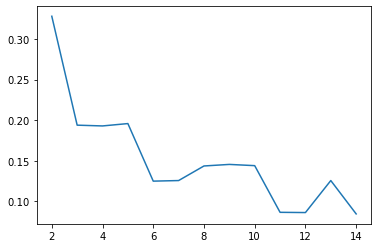

In [21]:
plt.plot(range(2,15), final_score)

# optimising the model

In [22]:
dummy_data= dummy_data.drop(['Gender_F'], axis=1)

In [23]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27276 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Orders                  27276 non-null  int64
 1   Jordan                  27276 non-null  int64
 2   Gatorade                27276 non-null  int64
 3   Samsung                 27276 non-null  int64
 4   Asus                    27276 non-null  int64
 5   Udis                    27276 non-null  int64
 6   Mondelez International  27276 non-null  int64
 7   Wrangler                27276 non-null  int64
 8   Vans                    27276 non-null  int64
 9   Fila                    27276 non-null  int64
 10  Brooks                  27276 non-null  int64
 11  H&M                     27276 non-null  int64
 12  Dairy Queen             27276 non-null  int64
 13  Fendi                   27276 non-null  int64
 14  Hewlett Packard         27276 non-null  int64
 15  Pladis             

In [24]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler().fit(dummy_data)

scaled_data= scale.transform(dummy_data)

In [25]:
scaled_data

array([[ 0.76948834, -0.33864289, -0.36537579, ..., -0.22360514,
        -0.18388622,  2.05506353],
       [-1.18540419, -0.33864289,  1.02496881, ..., -0.22360514,
        -0.18388622, -0.48660296],
       [ 0.76948834, -0.33864289,  1.02496881, ..., -0.22360514,
        -0.18388622,  2.05506353],
       ...,
       [-1.18540419, -0.33864289,  1.02496881, ..., -0.22360514,
        -0.18388622,  2.05506353],
       [-1.18540419, -0.33864289, -0.36537579, ..., -0.22360514,
        -0.18388622,  2.05506353],
       [-0.3475931 ,  2.10754975, -0.36537579, ..., -0.22360514,
        -0.18388622, -0.48660296]])

In [26]:
featured_scale= pd.DataFrame(scaled_data, columns= data.columns)

In [30]:
final_score=[]

n_cluster = range(2,8)
for k in n_cluster:
    cluster = KMeans(n_clusters = k, random_state=123)
    predict = cluster.fit_predict(scaled_data)
    
    score= silhouette_score(scaled_data, predict)
    final_score.append(score)

In [31]:
final_score

[0.3967621623057024,
 0.07362844336696837,
 0.07648202312863066,
 0.07421263377740991,
 0.07587192196229241,
 0.016465749501093144]

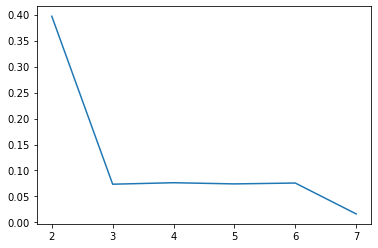

In [32]:
plt.plot(range(2,8), final_score)